#[가위바위보 분류기](https://github.com/Raziel-JKM/Practice/tree/main/ai/EX-1)

In [11]:
#이미지 사이즈 변경을 위해 PIL 라이브러리를 사용
from PIL import Image
import os, glob

In [12]:
#다른 환경 동일한  결론을 도출하기 위해 랜덤 시드 고정
import os
SEED = 42 
os.environ['PYTHONHASHSEED'] = str(SEED) 
os.environ['TF_DETERMINISTIC_OPS'] = '1' 
import random 
random.seed(SEED) 
import tensorflow as tf 
import numpy as np 
tf.random.set_seed(SEED) 
np.random.seed(SEED)

#이미지 사이즈 변경

In [13]:
#이미지의 크기가 28x28  변경
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS) 
		new_img.save(img, "JPEG")
    #ANTIALIAS는, anti-aliasing의 줄임말로, 높은 해상도의 신호를 낮은 해상도에서 나타낼 때 생기는 계단 현상(깨진 패턴)을 최소화
	print(len(images), " images resized.")

- Train 이미지 사이즈 변경

In [14]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path1 = "/content/drive/MyDrive/Data/train/scissor"
resize_images(image_dir_path1)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = "/content/drive/MyDrive/Data/train/rock"
resize_images(image_dir_path2)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path3 = "/content/drive/MyDrive/Data/train/paper"
resize_images(image_dir_path3)

print("보 이미지 resize 완료!")

400  images to be resized.
400  images resized.
가위 이미지 resize 완료!
400  images to be resized.
400  images resized.
바위 이미지 resize 완료!
400  images to be resized.
400  images resized.
보 이미지 resize 완료!


- Train set 가위 바위 보 라벨링

In [15]:
#가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링
import numpy as np

def load_data_train(img_path, number_of_data=1200):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


- Test set 가위 바위 보 라벨링

In [16]:
image_dir_path = "/content/drive/MyDrive/Data/train/"
(x_train, y_train)=load_data_train(image_dir_path)
x_train_norm = x_train / 255.0
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
x_train shape: (1200, 28, 28, 3)
y_train shape: (1200,)


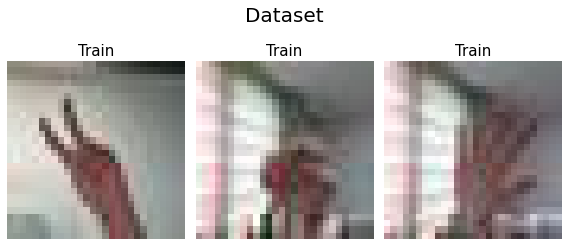

In [18]:
#라벨링 잘되었는지 샘플 확인
import matplotlib.pyplot as plt
%matplotlib inline
sample_train = [x_train[0], x_train[400], x_train[900]]
sample_images = sample_train

plt.figure(figsize=(8,8))
plt.suptitle("Dataset", fontsize=20)

for i, image in enumerate(sample_images):
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.title('Train' if i < 3 else 'Test', fontsize=15)
    plt.axis('off')   
plt.tight_layout()   

- Train Test 각각 범위 별로 잘 라벨링 된것을 확인 할 수 있다.

In [19]:
print(x_train.shape)

(1200, 28, 28, 3)


In [20]:
from sklearn.model_selection import train_test_split
# train, validation data 무작위로 섞어서 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train_norm, y_train, test_size=0.2, shuffle=True, random_state=12)

# train, validation data의 사이즈 확인
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(960, 28, 28, 3) (240, 28, 28, 3) (960,) (240,)


#네트워크 설계

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization

n_channel_1=32
n_channel_2=64
n_dense=128
    
model=Sequential()
model.add(Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(BatchNormalization())
model.add(Conv2D(n_channel_1, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(n_channel_1, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(n_channel_2, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(n_channel_2, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(n_channel_2, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(n_dense, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))



model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

- [sparse categorical crossentropy](https://bskyvision.com/822) : sparse categorical crossentropy 멀티클래스 분류에 사용되는 손실함수, 라벨이 0, 1, 2, 3, 4와 같이 정수의 형태로 제공될 때 사용한다.

In [22]:
result = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 189ms/step - loss: 0.7080 - sparse_categorical_accuracy: 0.7417 - val_loss: 1.0975 - val_sparse_categorical_accuracy: 0.3500
Epoch 2/20
30/30 [==============================] - 5s 180ms/step - loss: 0.2200 - sparse_categorical_accuracy: 0.9240 - val_loss: 1.3471 - val_sparse_categorical_accuracy: 0.3417
Epoch 3/20
30/30 [==============================] - 5s 179ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9677 - val_loss: 2.6817 - val_sparse_categorical_accuracy: 0.3417
Epoch 4/20
30/30 [==============================] - 5s 177ms/step - loss: 0.0496 - sparse_categorical_accuracy: 0.9823 - val_loss: 2.9553 - val_sparse_categorical_accuracy: 0.3417
Epoch 5/20
30/30 [==============================] - 5s 178ms/step - loss: 0.0423 - sparse_categorical_accuracy: 0.9865 - val_loss: 2.8706 - val_sparse_categorical_accuracy: 0.3417
Epoch 6/20
30/30 [==============================] - 5s 182ms/step - loss: 0.0285 - sparse_categorica

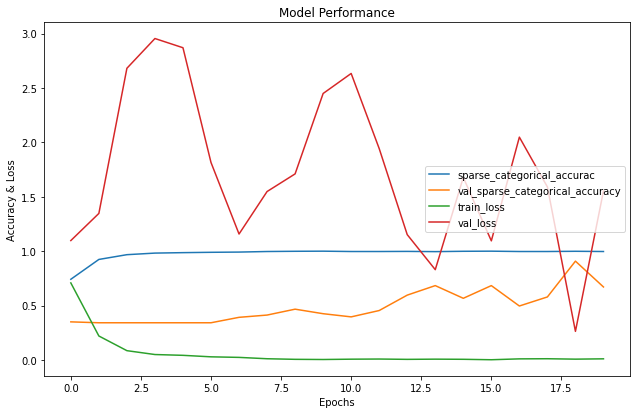

In [23]:
# epochs에 따른 accuracy, loss의 변화를 그래프로 시각화
plt.figure(figsize=(10.5, 6.5))

plt.plot(result.history['sparse_categorical_accuracy'])
plt.plot(result.history['val_sparse_categorical_accuracy'])
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['sparse_categorical_accurac', 'val_sparse_categorical_accuracy', 'train_loss', 'val_loss'], loc='center right')

- 성능이 잘 나오지 않아서 이미지제너레이터 까지 (초반)에 시도 하였지만, (후반)에 파라미터, 레이어 조절을 통해서 성능이 잘나와주었다.

- val_loss값(붉은색)이 급격하게 하락하였고, val_sparse_categorical_accuracy(주황)이 급격하게 상승하였다.

- 그냥 categorical crossentropy보다 sparse categorical crossentropy가 성능향상에 크게 기여한것같다.

# ImageDataGenerator 적용 성능향상 시도

In [24]:
#이미지 제너레이터
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        validation_split=0.2,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/train',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/train',
                                                 target_size = (28 , 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 960 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [25]:
import tensorflow as tf

model_IG = tf.keras.models.Sequential()


model_IG.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 3]))

model_IG.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_IG.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_IG.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_IG.add(tf.keras.layers.Dropout(0.3))
model_IG.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model_IG.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_IG.add(tf.keras.layers.Dropout(0.3))

model_IG.add(tf.keras.layers.Flatten())

model_IG.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_IG.add(tf.keras.layers.Dense(units=64, activation='relu'))

model_IG.add(tf.keras.layers.Dense(units=3, activation='softmax'))


model_IG.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
model_IG.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)         

In [26]:
result_IG  = model_IG.fit(x = train_gen, validation_data = val_gen, epochs = 30)   

Epoch 1/30
30/30 [==============================] - 4s 116ms/step - loss: 1.1016 - accuracy: 0.3417 - val_loss: 1.0993 - val_accuracy: 0.3875
Epoch 2/30
30/30 [==============================] - 4s 124ms/step - loss: 1.1023 - accuracy: 0.3250 - val_loss: 1.0982 - val_accuracy: 0.3167
Epoch 3/30
30/30 [==============================] - 4s 124ms/step - loss: 1.0989 - accuracy: 0.3365 - val_loss: 1.0975 - val_accuracy: 0.3375
Epoch 4/30
30/30 [==============================] - 3s 112ms/step - loss: 1.0988 - accuracy: 0.3385 - val_loss: 1.0954 - val_accuracy: 0.4167
Epoch 5/30
30/30 [==============================] - 3s 116ms/step - loss: 1.0989 - accuracy: 0.3458 - val_loss: 1.0976 - val_accuracy: 0.3458
Epoch 6/30
30/30 [==============================] - 4s 128ms/step - loss: 1.0973 - accuracy: 0.3646 - val_loss: 1.0945 - val_accuracy: 0.4375
Epoch 7/30
30/30 [==============================] - 4s 136ms/step - loss: 1.0977 - accuracy: 0.3396 - val_loss: 1.0932 - val_accuracy: 0.3583
Epoch 

In [27]:
history_IG = model_IG.history.history
history_IG.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

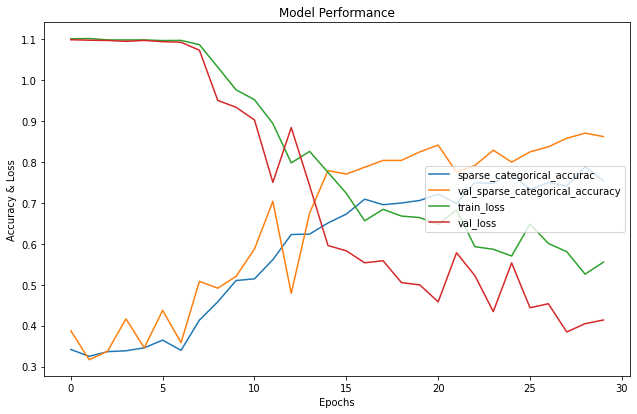

In [28]:
# epochs에 따른 accuracy, loss의 변화를 그래프로 시각화
plt.figure(figsize=(10.5, 6.5))

plt.plot(result_IG.history['accuracy'])
plt.plot(result_IG.history['val_accuracy'])
plt.plot(result_IG.history['loss'])
plt.plot(result_IG.history['val_loss'])

plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy & Loss')
plt.legend(['sparse_categorical_accurac', 'val_sparse_categorical_accuracy', 'train_loss', 'val_loss'], loc='center right')

# 결론
 - val_accuracy와 val_loss가 파라미터만 조절한 모델보다 약간 적게 나왔지만, 에폭을 늘리면 더 잘나올 수 도 있을것으로 생각된다.
 - 훈련하는 그래프도 ImageDataGenerator적용 모델이 상대적으로 안정적이다
 - 결론적으로 데이터의 중요성을 알 수 있는 부분이다. 적은양의 데이터로 모델로만으로 성능을 올릴 수 있지만 한계가 보이고 훈련 그래프 또한 불안정하다.
 - 좋은 모델도 중요하지만 양질의 데이터도 중요하다! 
 (여기서는 ImageDataGenerator가 데이터 증가 역할을 한다)
 
 # 추후 개선할 점 
 여기서는 ImageDataGenerator라는 모듈 내부도 많은 기능이 있는것 같다.
 다양한 파라미터 조정을 통해 좀 더 모델 훈련에 도움되는 방법을 찾아 봐야할 것같다.